In [5]:
import pandas as pd
import numpy as np
import os
import warnings
import logging
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

warnings.filterwarnings('ignore')
from src.preprocessing import preprocess
from src.paths import get_data_path

# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Create a handler to print logs in the notebook
handler = logging.StreamHandler()
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

np.random.seed(42)

In [2]:
data_path = get_data_path()
print(data_path)

/Users/pats/Desktop/my-ml-process-1/data


In [3]:
df = pd.read_csv(os.path.join(data_path, 'raw_data.csv'))
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [15]:
# Display the first few rows of the dataset
print(df.head())

# Get the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Get the data types of the features
print(df.dtypes)


       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level   
0  17:02:00      Monday              18-30          Male   Above high school  \
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle   
0                Employee              1-2yr           Automobile  \
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle   
0            Owner              Above 10

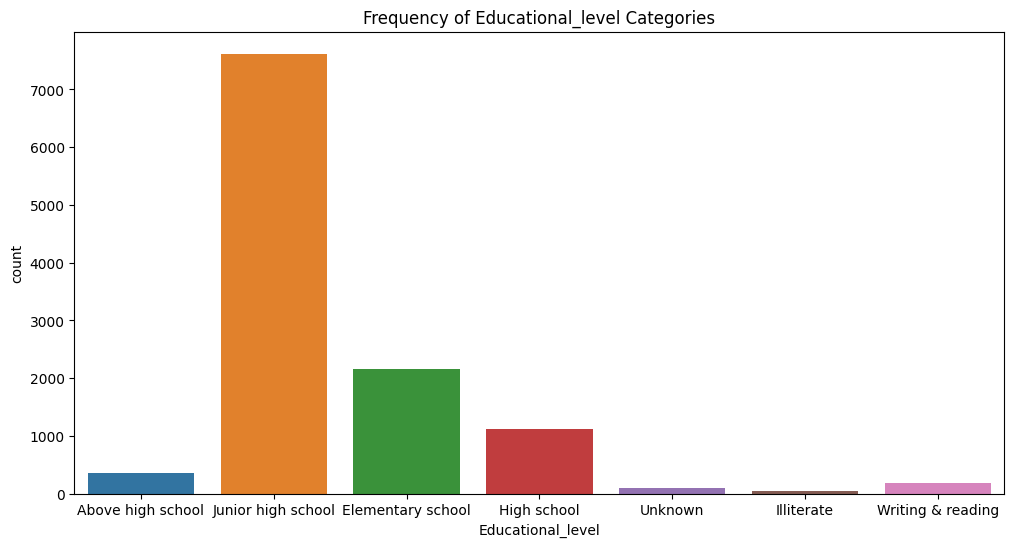

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64


In [22]:
# Analyzing a categorical feature
plt.rcParams['figure.figsize'] = (12, 6)
categorical_feature = "Educational_level"
sns.countplot(data=df, x=categorical_feature)
plt.title(f"Frequency of {categorical_feature} Categories")
plt.show()

print(df[categorical_feature].value_counts())

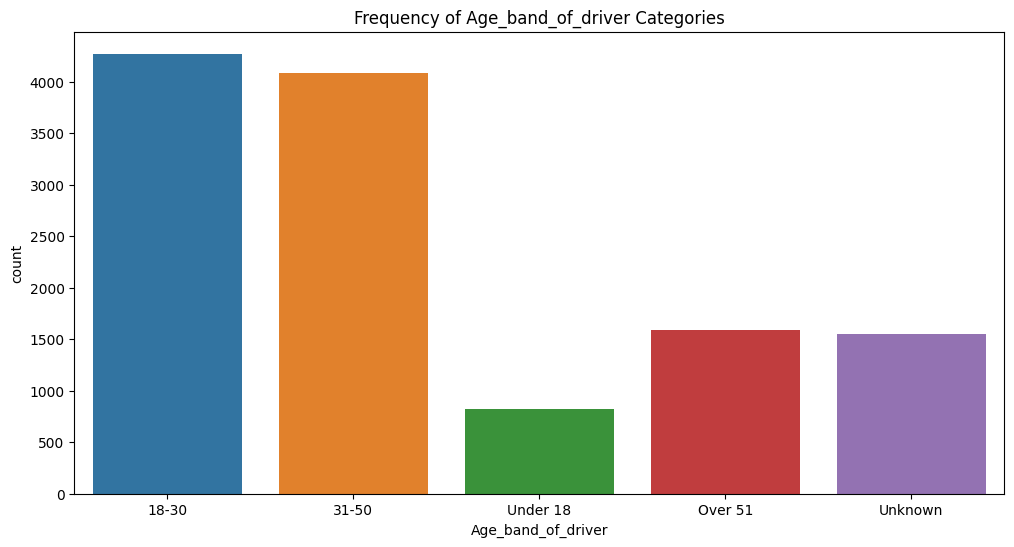

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64


In [23]:
# Analyzing a categorical feature
plt.rcParams['figure.figsize'] = (12, 6)
categorical_feature = "Age_band_of_driver"
sns.countplot(data=df, x=categorical_feature)
plt.title(f"Frequency of {categorical_feature} Categories")
plt.show()

print(df[categorical_feature].value_counts())

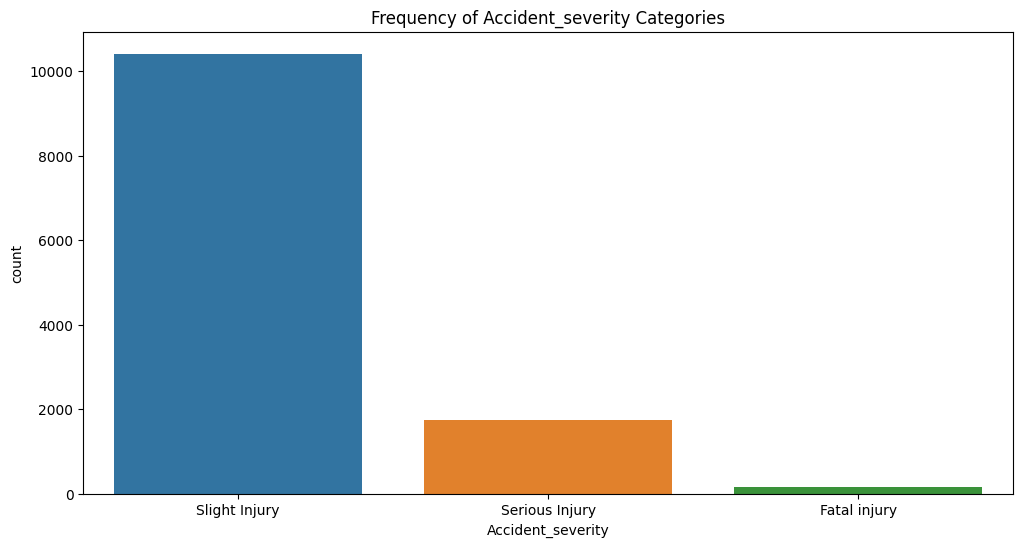

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


In [25]:
# Analyzing a categorical feature
plt.rcParams['figure.figsize'] = (12, 6)
categorical_feature = "Accident_severity"
sns.countplot(data=df, x=categorical_feature)
plt.title(f"Frequency of {categorical_feature} Categories")
plt.show()

print(df[categorical_feature].value_counts())

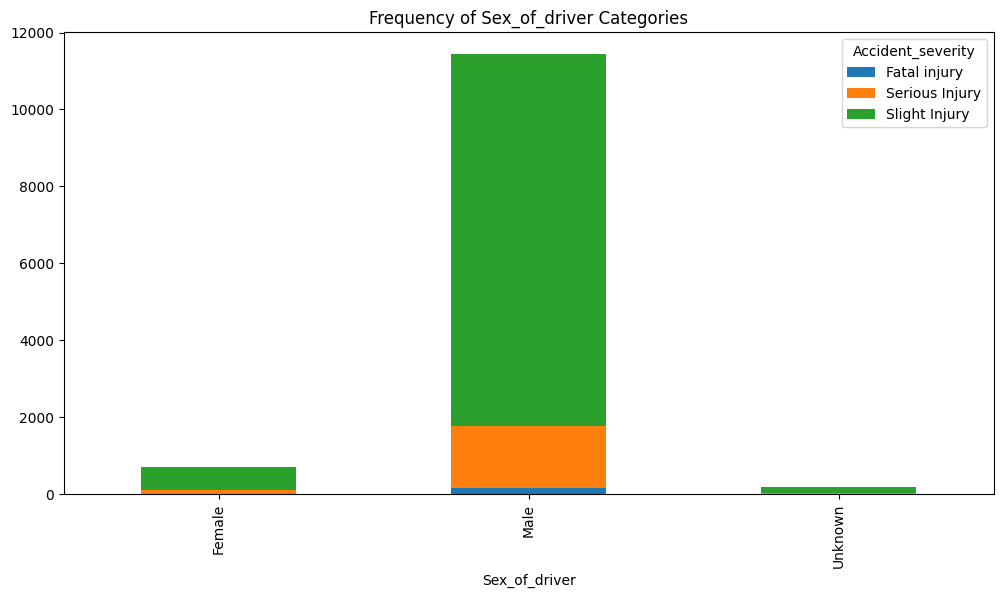

In [27]:
import pandas as pd

# Bar plot
categorical_feature = "Sex_of_driver"
target_variable = "Accident_severity"
df.groupby(categorical_feature)[target_variable].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title(f"Frequency of {categorical_feature} Categories")
plt.show()

In [29]:
((df.groupby(['Sex_of_driver']).size() / df["Sex_of_driver"].count()) * 100).add_prefix('Accidents(in %) Caused by ')

Sex_of_driver
Accidents(in %) Caused by Female      5.691783
Accidents(in %) Caused by Male       92.862943
Accidents(in %) Caused by Unknown     1.445274
dtype: float64

In [31]:
ff = pd.crosstab(index=df['Sex_of_driver'].loc[df['Sex_of_driver'] !="Unknown"], columns=df['Accident_severity']
                 , margins=True)
ff

Accident_severity,Fatal injury,Serious Injury,Slight Injury,All
Sex_of_driver,,,,
Female,5,104,592,701
Male,152,1621,9664,11437
All,157,1725,10256,12138


In [32]:
print("P(Gender = Female | Severity = Fatal) = " + str((ff.iloc[0,0])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Fatal) = " + str((ff.iloc[1,0])/(ff.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Serious Injury) = " + str((ff.iloc[0,1])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Serious Injury) = " + str((ff.iloc[1,1])/(ff.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Slight Injury) = " + str((ff.iloc[0,2])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Slight Injury) = " + str((ff.iloc[1,2])/(ff.iloc[1,3]*1.0)*100) + '%')

P(Gender = Female | Severity = Fatal) = 0.7132667617689016%
P(Gender = Male | Severity = Fatal) = 1.3290198478622017%

P(Gender = Female | Severity = Serious Injury) = 14.835948644793154%
P(Gender = Male | Severity = Serious Injury) = 14.173297193319925%

P(Gender = Female | Severity = Slight Injury) = 84.45078459343794%
P(Gender = Male | Severity = Slight Injury) = 84.49768295881788%
